In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
df=pd.read_csv("Firm_level_data.csv")

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [4]:
df  = df.drop("Unnamed: 0", axis=True)

In [5]:
df

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46
...,...,...,...,...,...,...,...,...,...
754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [7]:
df.describe(include="all")

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,759,738.000000,759.000000,759.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,542,NaN,NaN,NaN
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,NaN,2.794910,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,NaN,3.366591,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,NaN,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,NaN,1.018783,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,NaN,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,NaN,3.139309,2054.160386,60.510000


In [8]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

SP500 :  2
yes    217
no     542
Name: sp500, dtype: int64




In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [11]:
df.skew()

sales            9.219023
capital          7.555091
patents          7.766943
randd           10.270483
employment       9.068875
tobinq           3.285773
value            6.075996
institutions    -0.168071
dtype: float64

<AxesSubplot:>

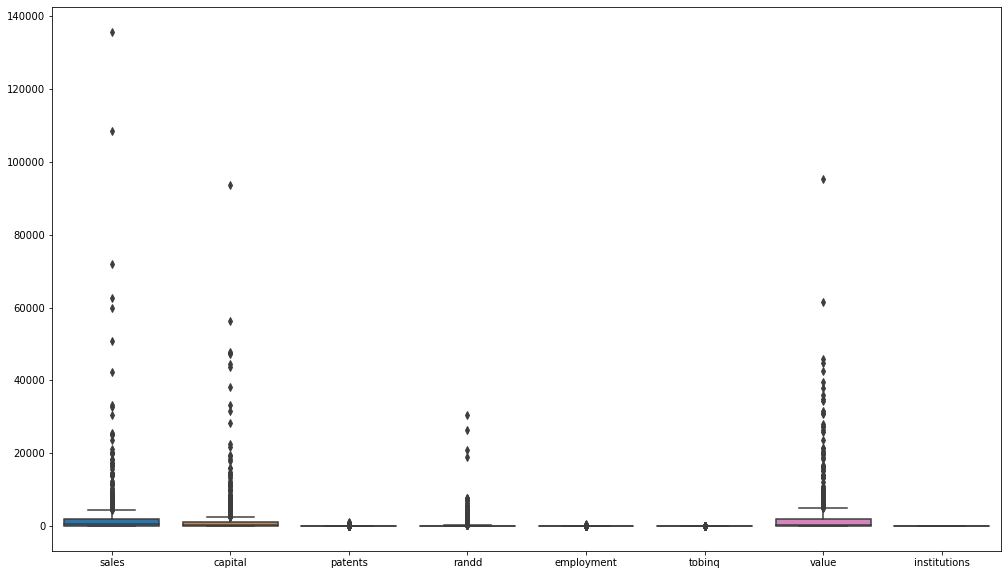

In [12]:
import seaborn as sns
from matplotlib.pyplot import figure
#sns.set_theme(style="whitegrid")
figure(figsize=(17,10))
sns.boxplot(data=df)

In [13]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure(figsize=(10,5))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='black');
    figure(figsize=(5,5))
    plt.show()
    
    plt.figure(figsize=(10,5))
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column], color='r')
    plt.show()

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

8

Description of sales
----------------------------------------------------------------------------
count       759.000000
mean       2689.705158
std        8722.060124
min           0.138000
25%         122.920000
50%         448.577082
75%        1822.547366
max      135696.788200
Name: sales, dtype: float64 Distribution of sales
----------------------------------------------------------------------------


D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


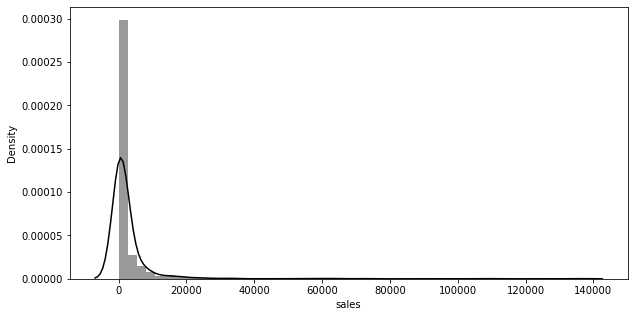

<Figure size 360x360 with 0 Axes>

BoxPlot of sales
----------------------------------------------------------------------------


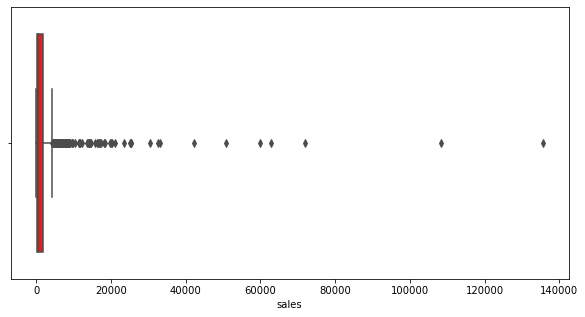

Description of capital
----------------------------------------------------------------------------
count      759.000000
mean      1977.747498
std       6466.704896
min          0.057000
25%         52.650501
50%        202.179023
75%       1075.790020
max      93625.200560
Name: capital, dtype: float64 Distribution of capital
----------------------------------------------------------------------------


D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


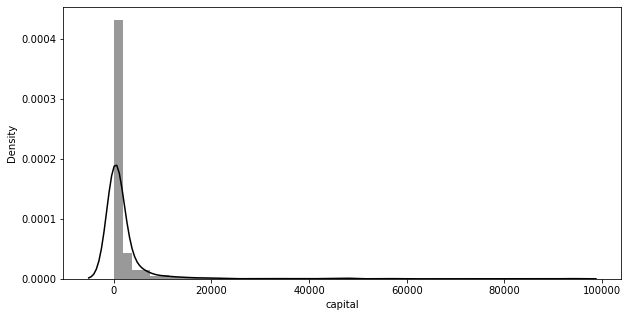

<Figure size 360x360 with 0 Axes>

BoxPlot of capital
----------------------------------------------------------------------------


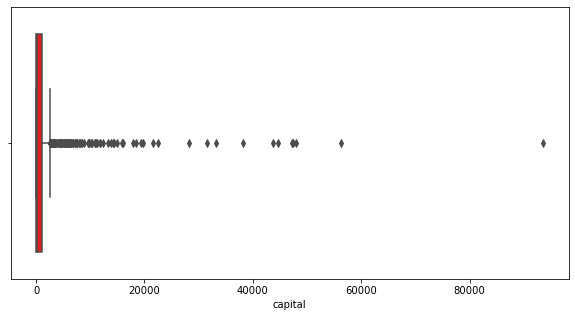

Description of patents
----------------------------------------------------------------------------
count     759.000000
mean       25.831357
std        97.259577
min         0.000000
25%         1.000000
50%         3.000000
75%        11.500000
max      1220.000000
Name: patents, dtype: float64 Distribution of patents
----------------------------------------------------------------------------


D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


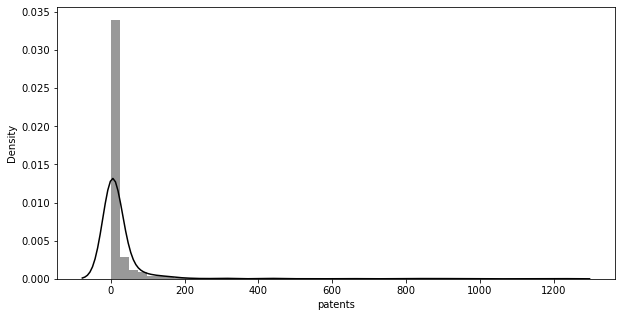

<Figure size 360x360 with 0 Axes>

BoxPlot of patents
----------------------------------------------------------------------------


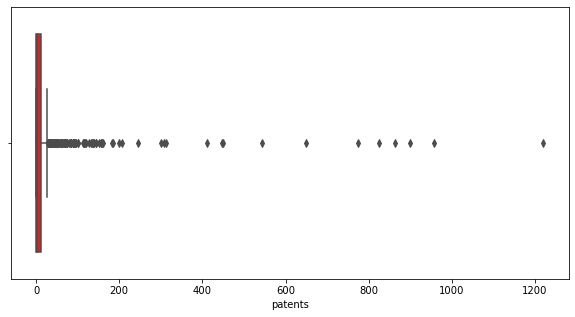

Description of randd
----------------------------------------------------------------------------
count      759.000000
mean       439.938074
std       2007.397588
min          0.000000
25%          4.628262
50%         36.864136
75%        143.253403
max      30425.255860
Name: randd, dtype: float64 Distribution of randd
----------------------------------------------------------------------------


D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


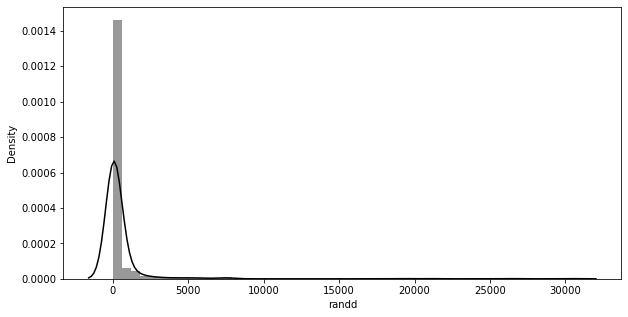

<Figure size 360x360 with 0 Axes>

BoxPlot of randd
----------------------------------------------------------------------------


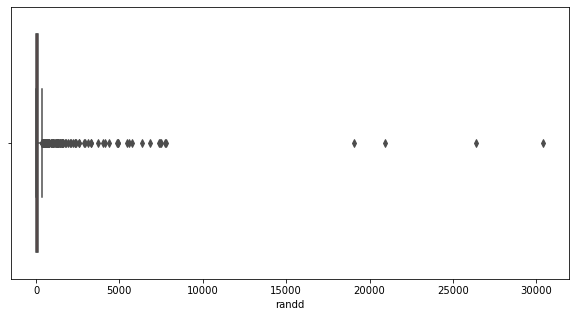

Description of employment
----------------------------------------------------------------------------
count    759.000000
mean      14.164519
std       43.321443
min        0.006000
25%        0.927500
50%        2.924000
75%       10.050001
max      710.799925
Name: employment, dtype: float64 Distribution of employment
----------------------------------------------------------------------------


D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


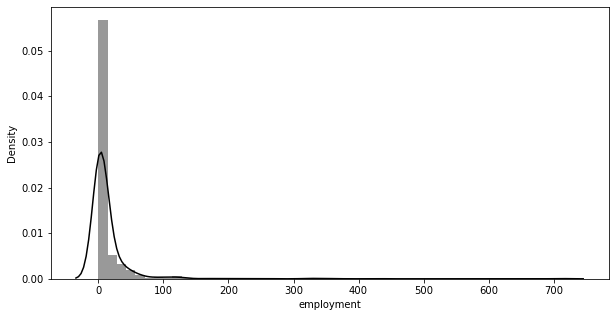

<Figure size 360x360 with 0 Axes>

BoxPlot of employment
----------------------------------------------------------------------------


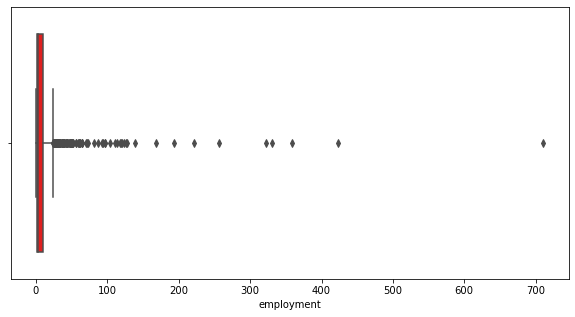

Description of tobinq
----------------------------------------------------------------------------
count    738.000000
mean       2.794910
std        3.366591
min        0.119001
25%        1.018783
50%        1.680303
75%        3.139309
max       20.000000
Name: tobinq, dtype: float64 Distribution of tobinq
----------------------------------------------------------------------------


D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


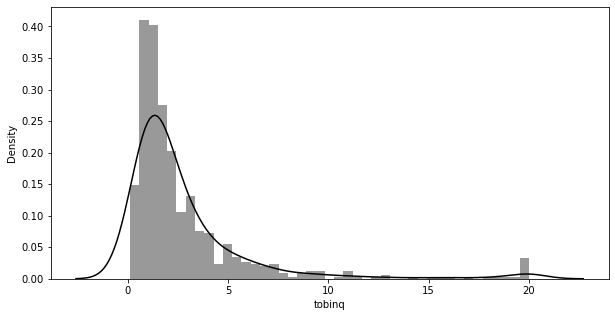

<Figure size 360x360 with 0 Axes>

BoxPlot of tobinq
----------------------------------------------------------------------------


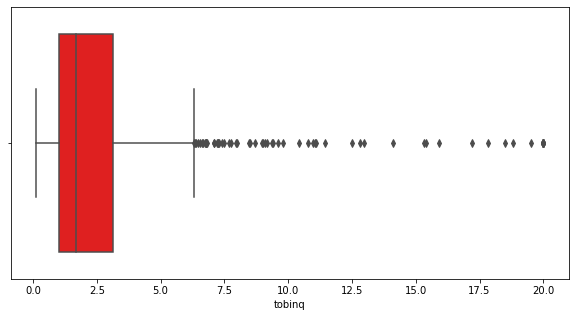

Description of value
----------------------------------------------------------------------------
count      759.000000
mean      2732.734750
std       7071.072362
min          1.971053
25%        103.593946
50%        410.793529
75%       2054.160386
max      95191.591160
Name: value, dtype: float64 Distribution of value
----------------------------------------------------------------------------


D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


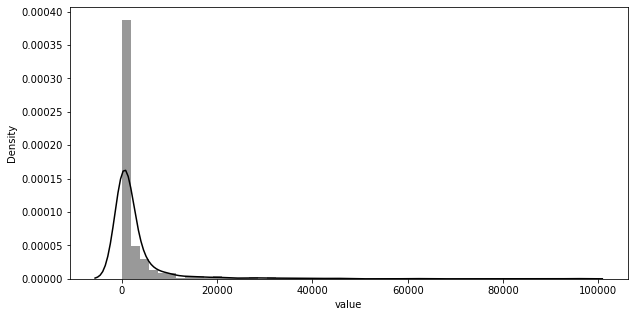

<Figure size 360x360 with 0 Axes>

BoxPlot of value
----------------------------------------------------------------------------


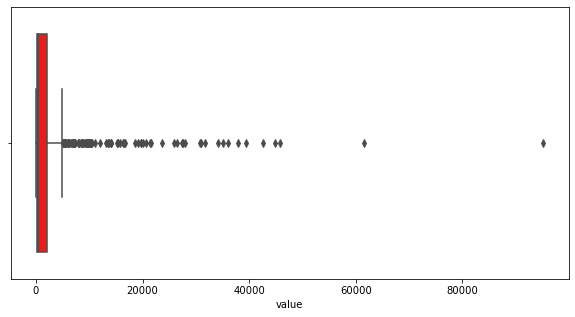

Description of institutions
----------------------------------------------------------------------------
count    759.000000
mean      43.020540
std       21.685586
min        0.000000
25%       25.395000
50%       44.110000
75%       60.510000
max       90.150000
Name: institutions, dtype: float64 Distribution of institutions
----------------------------------------------------------------------------


D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


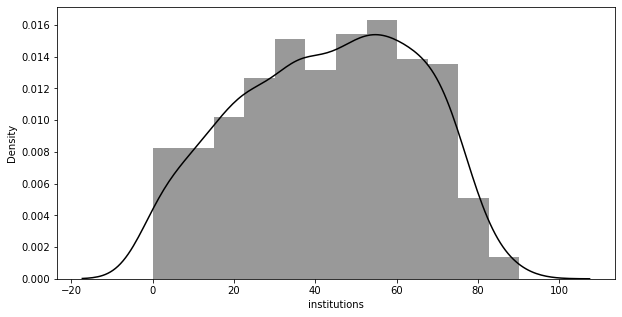

<Figure size 360x360 with 0 Axes>

BoxPlot of institutions
----------------------------------------------------------------------------


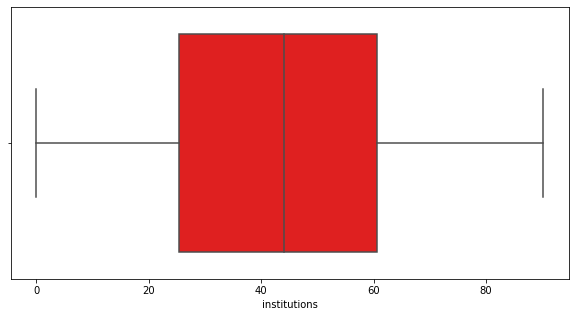

In [15]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

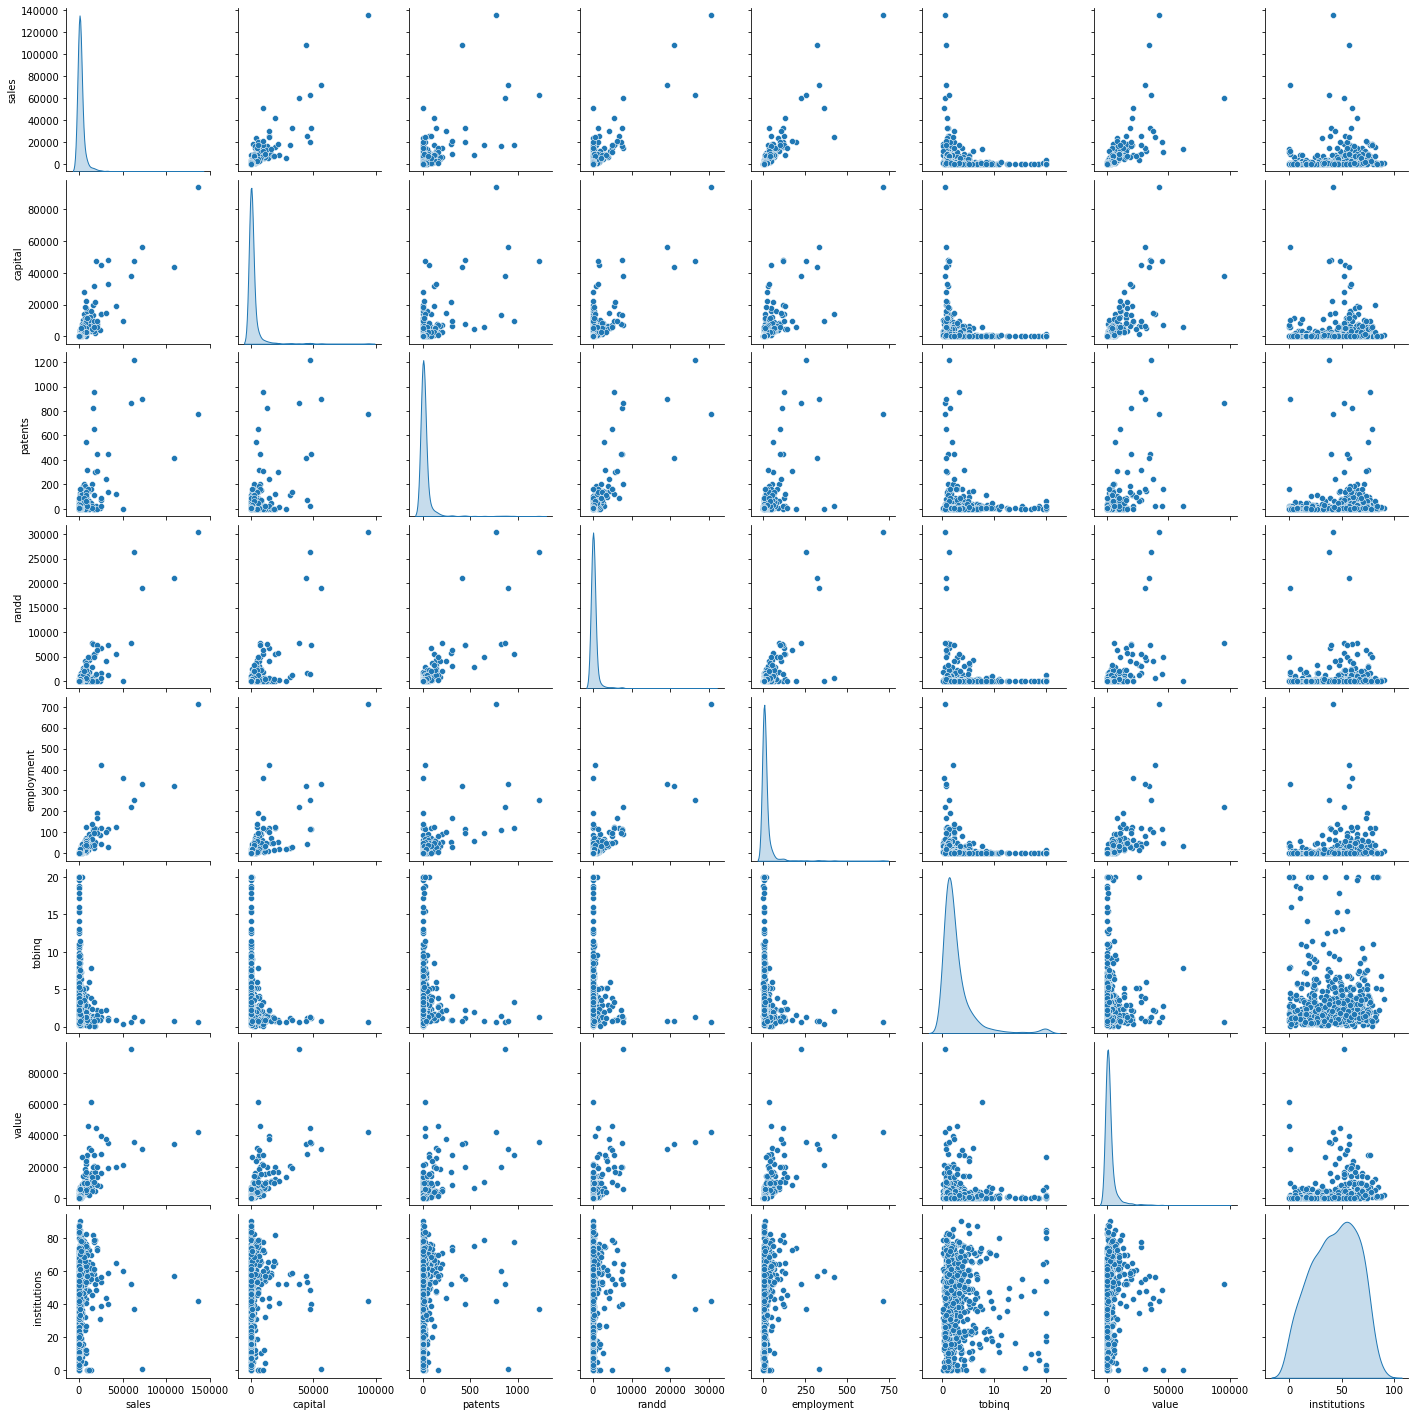

In [16]:
sns.pairplot(df,diag_kind='kde');

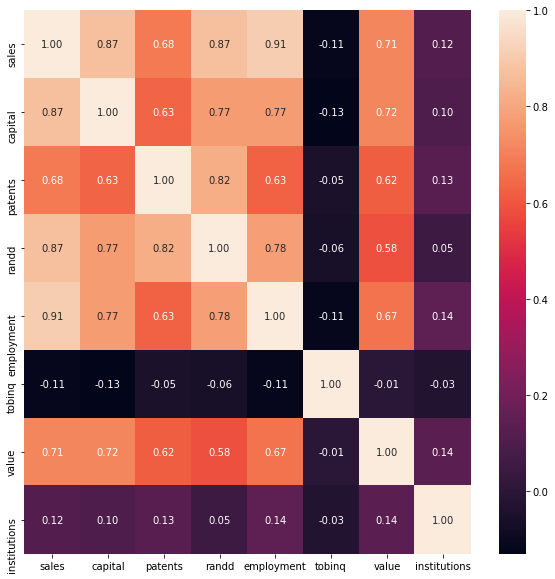

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [18]:
missing_col = ['tobinq']
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()
print("count of NULL values after imputation\n")
df.isnull().sum()

count of NULL values after imputation



sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        759 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [20]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: sp500
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [21]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,0,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,0,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,1,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,0,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,0,1.063300,67.406408,49.46


In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

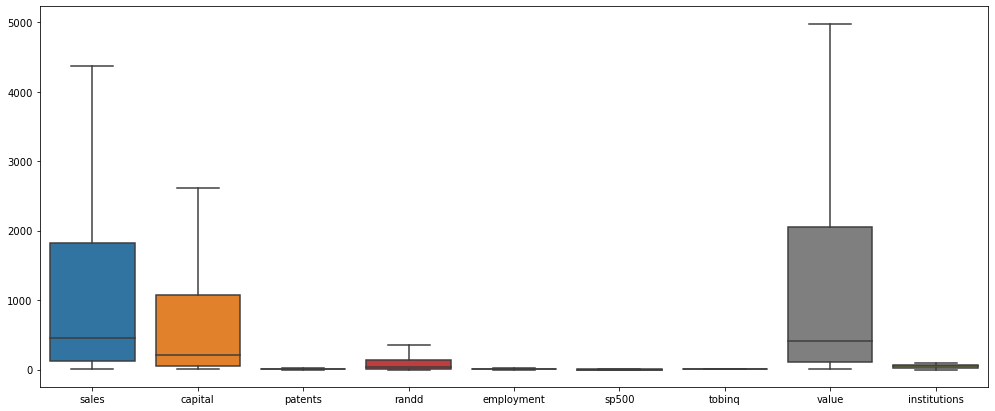

In [24]:
import seaborn as sns
from matplotlib.pyplot import figure
#sns.set_theme(style="whitegrid")
figure(figsize=(17,7))
sns.boxplot(data=df)

In [25]:
df2 = df
df2.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10.00,351.191114,2.306000,0.0,6.153448,1625.453755,80.27
1,407.753973,122.101012,2.00,0.000000,1.860000,0.0,0.844187,243.117082,59.02
2,4371.988416,2610.499299,27.25,351.191114,23.733752,1.0,5.205257,4980.010044,47.70
3,451.000010,266.899987,1.00,83.540161,3.071000,0.0,0.305221,63.024630,26.88
4,174.927981,140.124004,2.00,14.233637,1.947000,0.0,1.063300,67.406408,49.46


In [26]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc

StandardScaler()

In [27]:
df['sales'] = stdsc.fit_transform(df[['sales']])
df['capital'] = stdsc.fit_transform(df[['capital']])
df['patents'] = stdsc.fit_transform(df[['patents']])
df['randd'] = stdsc.fit_transform(df[['randd']])
df['employment'] = stdsc.fit_transform(df[['employment']])
df['sp500'] = stdsc.fit_transform(df[['sp500']])
df['tobinq'] = stdsc.fit_transform(df[['tobinq']])
df['value'] = stdsc.fit_transform(df[['value']])
df['institutions'] = stdsc.fit_transform(df[['institutions']])

In [28]:
dfs = df
df2 = df
dfs.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,-0.267788,-0.591504,0.221152,1.979986,-0.564800,-0.632747,2.237668,0.142598,1.718839
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,-0.632747,-0.845706,-0.645807,0.738279
2,2.052715,1.962722,1.955496,1.979986,2.055116,1.580410,1.687002,2.055843,0.215929
3,-0.513909,-0.481679,-0.683723,-0.125658,-0.471265,-0.632747,-1.158713,-0.748521,-0.744789
4,-0.694622,-0.613908,-0.583181,-0.670901,-0.608694,-0.632747,-0.718456,-0.746022,0.297142


In [29]:
# Copy all the predictor variables into X dataframe
X = df2.drop('sales', axis=1)

# Copy target into the y dataframe. 
y = df2[['sales']]

In [30]:
X

,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,-0.591504,0.221152,1.979986,-0.564800,-0.632747,2.237668,0.142598,1.718839
1,-0.632706,-0.583181,-0.782879,-0.619331,-0.632747,-0.845706,-0.645807,0.738279
2,1.962722,1.955496,1.979986,2.055116,1.580410,1.687002,2.055843,0.215929
3,-0.481679,-0.683723,-0.125658,-0.471265,-0.632747,-1.158713,-0.748521,-0.744789
4,-0.613908,-0.583181,-0.670901,-0.608694,-0.632747,-0.718456,-0.746022,0.297142
...,...,...,...,...,...,...,...,...
754,-0.021294,1.955496,1.979986,1.855361,1.580410,-0.930922,-0.632117,-0.439316
755,-0.683224,-0.683723,-0.782582,-0.640850,-0.632747,-0.360128,-0.654157,0.156403
756,-0.630802,0.522777,-0.193937,-0.668238,-0.632747,1.701211,-0.453422,-0.035556
757,-0.615309,-0.181015,-0.777987,-0.492173,1.580410,-0.392015,-0.607695,0.847640


In [31]:
y

,sales
0,-0.267788
1,-0.542217
2,2.052715
3,-0.513909
4,-0.694622
...,...
754,0.011658
755,-0.696656
756,-0.676425
757,-0.294827


In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [34]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [35]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.2542145681964211
The coefficient for patents is -0.030353401814672276
The coefficient for randd is 0.05312970952887875
The coefficient for employment is 0.4206152227713746
The coefficient for sp500 is 0.049651733162052104
The coefficient for tobinq is -0.04619356287534611
The coefficient for value is 0.28180841575879334
The coefficient for institutions is 0.0030198015674889147


In [36]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.003068901535704254


In [37]:
# R square on training data
regression_model.score(X_train, y_train)

0.9359702538559448

In [38]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9240311293641786

In [39]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.2581275829531501

In [40]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2618357790172932

In [41]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions,sales
626,0.612227,0.723860,-0.206409,1.167240,-0.632747,-0.373364,0.488463,-0.532988,0.465498
333,-0.744145,-0.583181,-0.710087,-0.777545,-0.632747,-1.114266,-0.778833,-0.984276,-0.769637
257,-0.198723,1.226569,-0.095381,-0.036482,-0.632747,-0.100860,-0.203035,1.228328,-0.111504
173,0.081876,-0.784265,-0.240832,0.083340,1.580410,0.494257,0.482702,1.230635,-0.027782
242,-0.340238,-0.583181,-0.782879,-0.657234,-0.632747,-0.084802,-0.580261,1.956480,-0.701687


In [42]:
expr='sales~capital + patents + randd + employment + sp500 + tobinq + value + institutions'

In [43]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       0.003069
capital         0.254215
patents        -0.030353
randd           0.053130
employment      0.420615
sp500           0.049652
tobinq         -0.046194
value           0.281808
institutions    0.003020
dtype: float64

In [44]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     953.8
Date:                Mon, 25 Jul 2022   Prob (F-statistic):          7.27e-306
Time:                        19:48:56   Log-Likelihood:                -34.322
No. Observations:                 531   AIC:                             86.64
Df Residuals:                     522   BIC:                             125.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0031      0.011      0.271   

In [45]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('sales',axis=1))-data_train['sales'])**2)

In [46]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.25812758295315

In [47]:
np.sqrt(lm1.mse_resid) #another way

0.26034331100037117

In [48]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

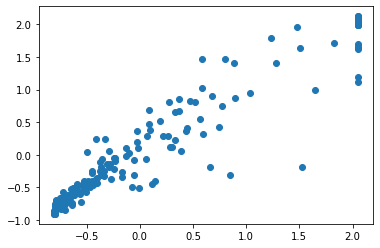

In [49]:
plt.scatter(y_test['sales'], y_pred)
plt.show()

In [50]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (0.25) * capital + (-0.03) * patents + (0.05) * randd + (0.42) * employment + (0.05) * sp500 + (-0.05) * tobinq + (0.28) * value + (0.0) * institutions + 